In [1]:
from analysis.analysis import *
import cv2
import matplotlib
import json
# !pip3 install xarray

In [2]:
# comparison values (from analysis.py)
print(f"Datasets: \t\t{datasets}")
print(f"Metrics: \t\t{list(metrics_dict.keys())}")
print(f"Methods: \t\t{methods}")
print(f"Methods Upsample: \t{methods_upsample}")
params_print = json.dumps(dict({k: str(v) for k, v in params.items()}), indent=4)
print(f"params: {params_print}")
print(f"Default params: {json.dumps(default_params, indent=4)}")
full_names = {
    "w_sizes": "Window Size",
    "srs": "Sigma Range",
    "gsfs": "Gauss Sigma Factor"
}

Datasets: 		['Baby1', 'Cloth1', 'Art', 'Flowerpots', 'Reindeer', 'Midd1', 'Laundry', 'Bowling1', 'Aloe', 'Dolls', 'Moebius', 'Books']
Metrics: 		['SSIM', 'MSE_inverted', 'NCC']
Methods: 		['JB', 'Bilet']
Methods Upsample: 	['Iter', 'JBU']
params: {
    "w_sizes": "[3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23]",
    "srs": "[3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33, 35, 37, 39, 41, 43, 45, 47, 49]",
    "gsfs": "[0.1, 0.3, 0.5, 0.7, 0.9, 1.1, 1.3, 1.5, 1.7, 1.9, 2.1, 2.3, 2.5, 2.7, 2.9]"
}
Default params: {
    "w_sizes": 10,
    "gsfs": 1.5,
    "srs": 25
}


In [3]:
metrics_all = {}
for Algo in methods:
    metrics_all[Algo] = {}
    for param in params.keys():
        metrics_all[Algo][param] = get_avg_metrics(get_metrics_param_func(Algo, param))


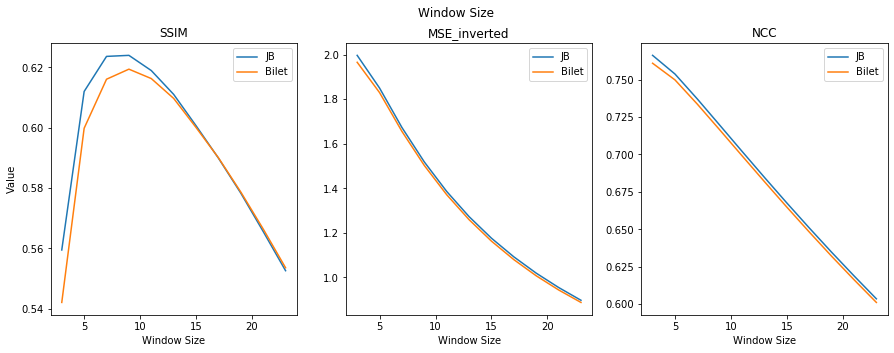

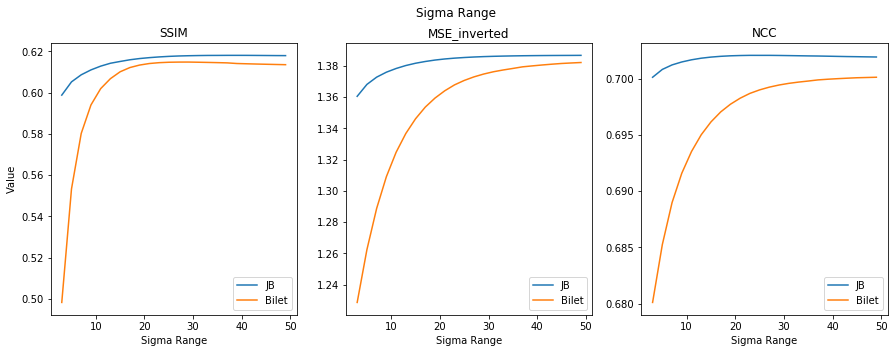

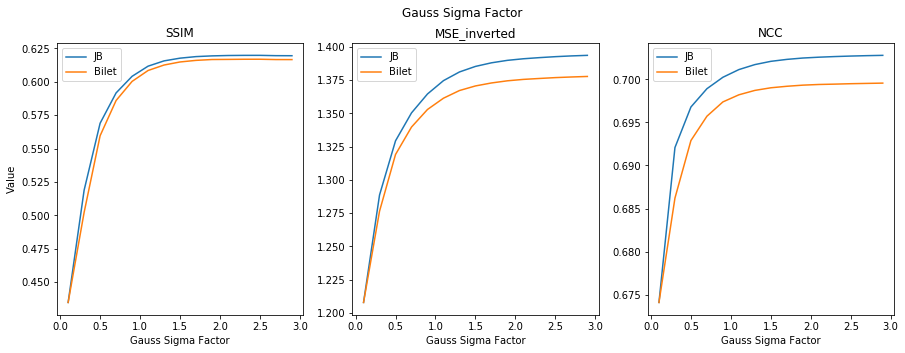

In [4]:

for param in params.keys():
    fig, axes = plt.subplots(nrows=1, ncols=len(metrics_dict.keys()), sharex=True, figsize=(15, 5))
    plt.suptitle(full_names[param])
    # param = "w_sizes"
    for method in methods:
        for i, metric in enumerate(metrics_dict.keys()):
            ax = axes[i] 
            metrics_all[method][param][metric].plot(ax=ax, label=method)
            ax.set_xlabel(full_names[param])
            if i == 0:
                ax.set_ylabel("Value")
            ax.set_title(metric)
            ax.legend()
    plt.plot()

In [5]:
metrics_all_upsample = {}
for Algo in methods_upsample:
    metrics_all_upsample[Algo] = {}
    for param in params.keys():
        metrics_all_upsample[Algo][param] = get_avg_metrics(get_metrics_param_func(Algo, param))

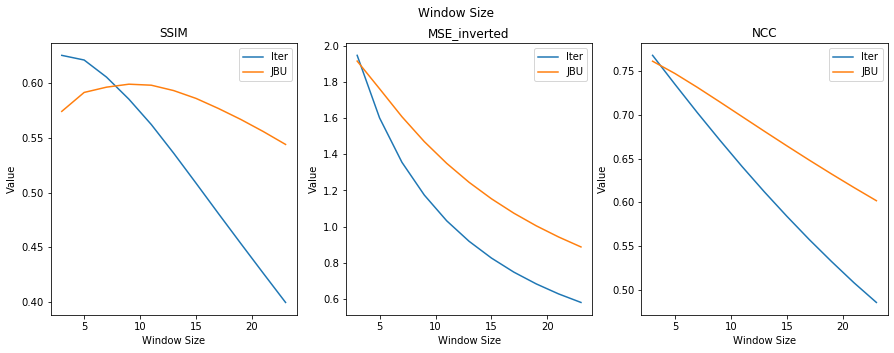

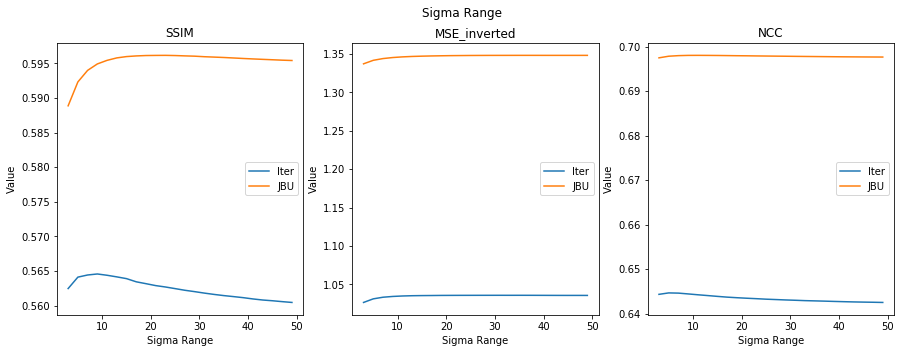

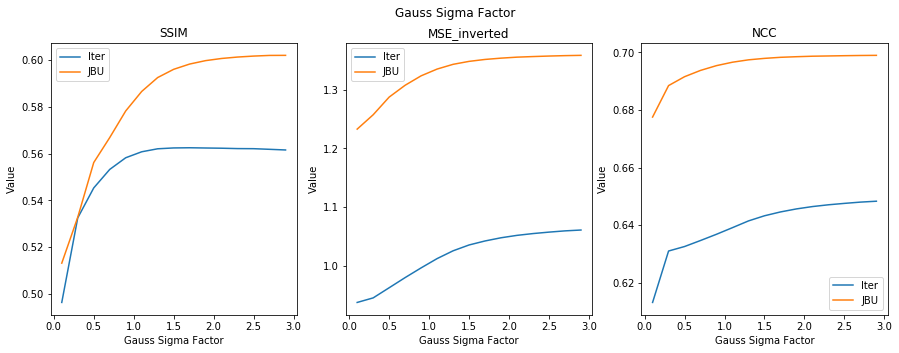

In [6]:
for param in params.keys():
    fig, axes = plt.subplots(nrows=1, ncols=len(metrics_dict.keys()), sharex=True, figsize=(15, 5))
    plt.suptitle(full_names[param])
    # param = "w_sizes"
    for method in methods_upsample:
        for i, metric in enumerate(metrics_dict.keys()):
            ax = axes[i] 
            metrics_all_upsample[method][param][metric].plot(ax=ax, label=method)
            ax.set_xlabel(full_names[param])
            ax.set_ylabel("Value")
            ax.set_title(metric)
            ax.legend()
    plt.plot()

In the next cell we can see that, generally, 9.0 could be an optimal value for lambda as metrics stop improving. <br/>
If lambda is too big, the metrics would be worser. <br/>
Although, "optimal" value of lambda (~20) would vanish important small details, so for further comparison I would use almost optimal still adequate lambda = 9.0

In the next cell we can see, that in general Metrics for minimum window size for Dynamic Programming approach are much better then for window size 9 naive approach <br/>
Accound that window size 9 would compute on my 16-cores laptop for ~10 minutes. <br/>
In the same time, DP would compute for ~9 seconds only which is ~90 times faster for better result 

In [7]:
# ax = avg_metrics_method.T.plot.bar()
# ax.set_xlabel("metric")
# ax.set_ylabel("matric value")

NameError: name 'avg_metrics_method' is not defined

In the next cell we can see that depending on the window size, performance of DP approach increases slightly, but it doesn't worth it for sure

In the next cell we can see that for naive approach, window size directly improves the performance

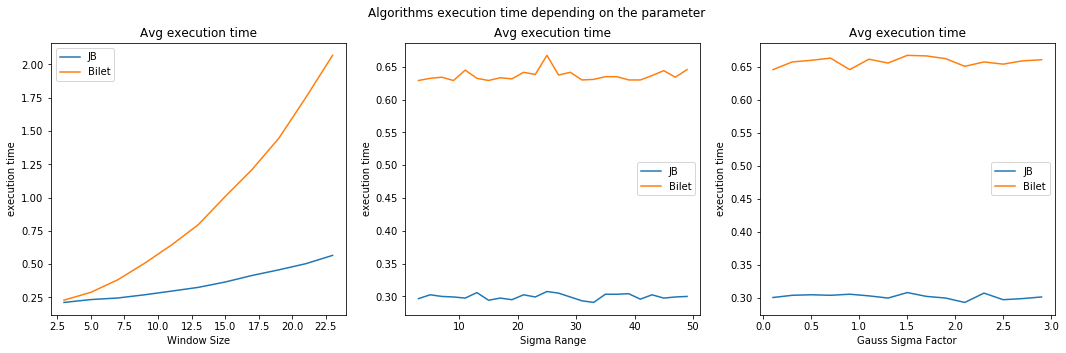

In [12]:
fig, axes = plt.subplots(nrows=1, ncols=len(full_names), figsize=(18, 5))
plt.suptitle("Algorithms execution time depending on the parameter")
for i, param_name in enumerate(params.keys()):
    ax = axes[i]
    exec_times_ws = get_avg_metrics(get_time_method_param_func(param_name, methods))
    exec_times_ws.plot(ax = ax)
    ax.set_xlabel(full_names[param_name])
    ax.set_ylabel("execution time")
    ax.set_title("Avg execution time")
    # plt.show()
plt.show()

In the next cell we can see that for both approaches, increasing the window size would increase the execution time more and more. <br/>
Although, dynamic programming approach is still much faster for every given window size 

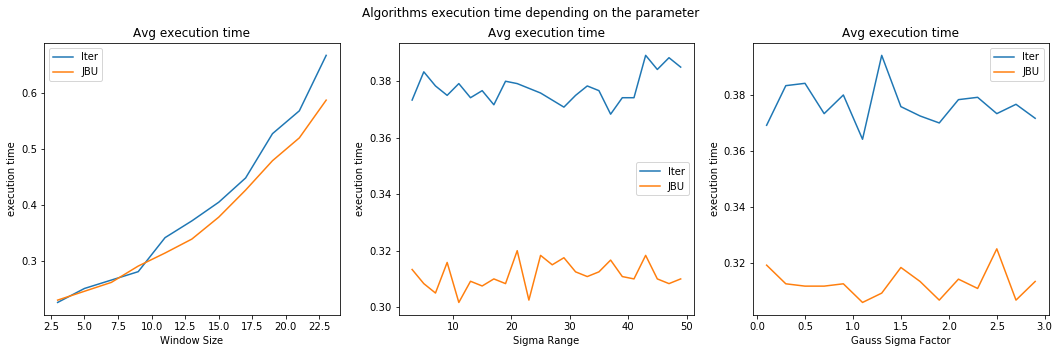

In [14]:
fig, axes = plt.subplots(nrows=1, ncols=len(full_names), figsize=(18, 5))
plt.suptitle("Algorithms execution time depending on the parameter")
for i, param_name in enumerate(params.keys()):
    ax = axes[i]
    exec_times_ws = get_avg_metrics(get_time_method_param_func(param_name, methods_upsample))
    exec_times_ws.plot(ax = ax)
    ax.set_xlabel(full_names[param_name])
    ax.set_ylabel("execution time")
    ax.set_title("Avg execution time")
    # plt.show()
plt.show()

In the following cell, we can see that execution time of the DP approach is not affected by lambda at all

In the following cell you can see difference images for each dataset for DP (l=9.0, ws = 1) and naive (ws=9) approaches. <br/>
We can see that for naive approach the difference is sometimes very big. <br/>
Although, for DP approach the differences occur on the lines where it is more benefitial for optimization to keep the same disparity, which could be a problem.

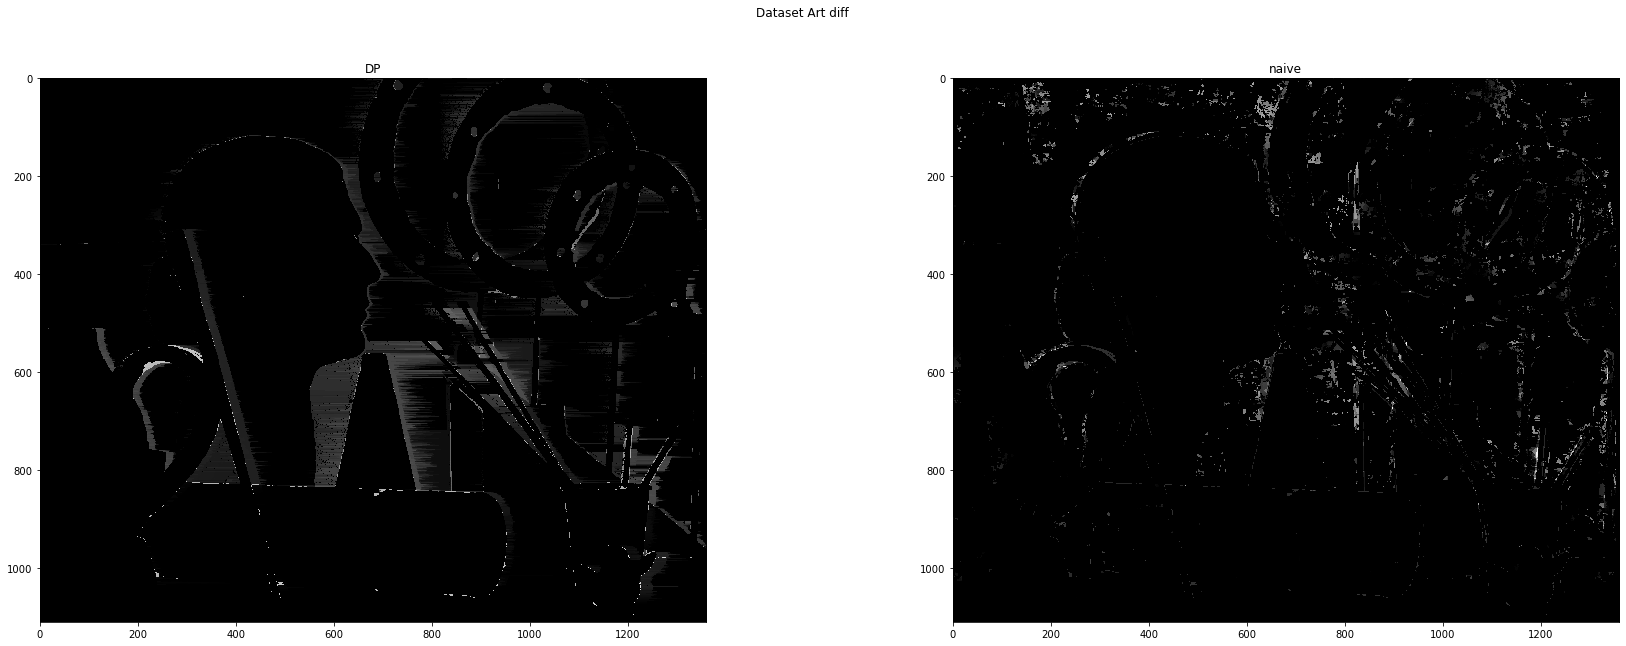

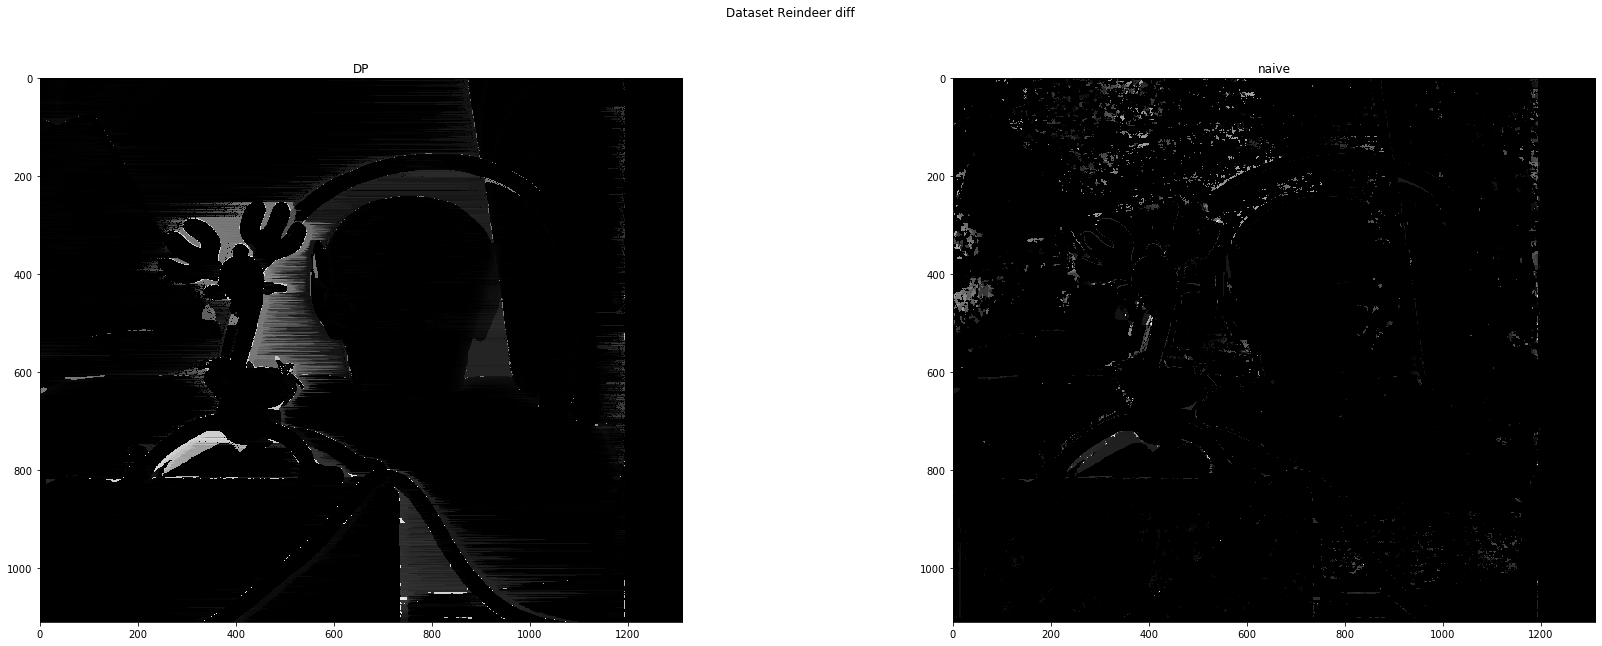

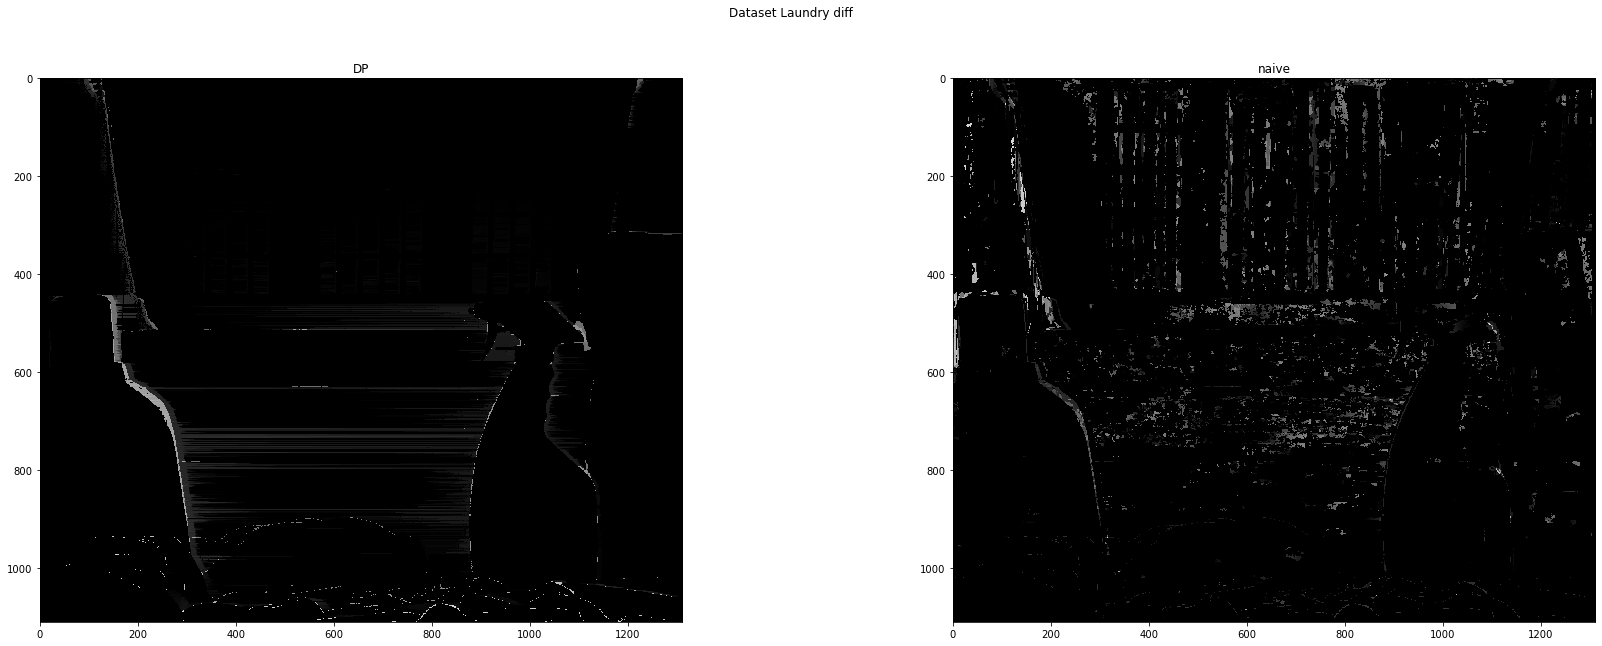

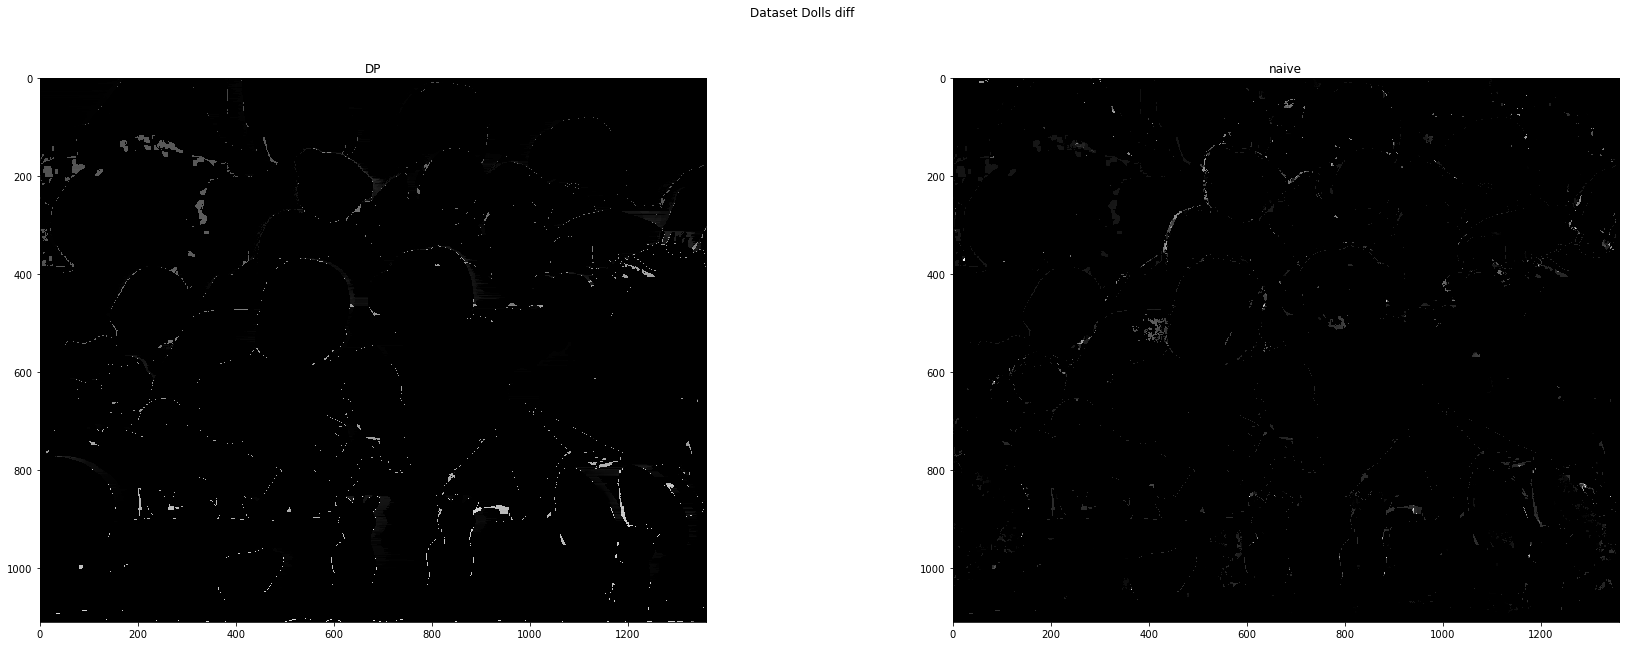

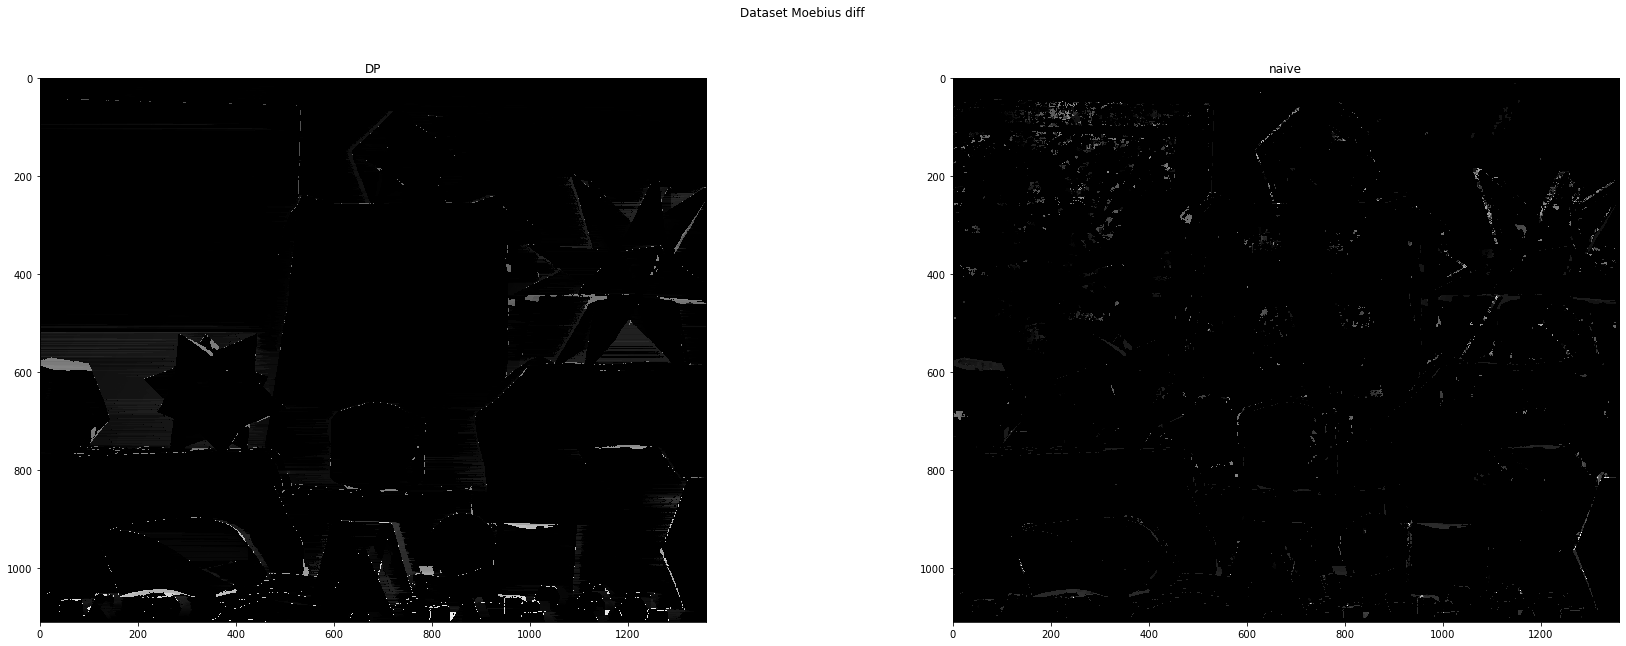

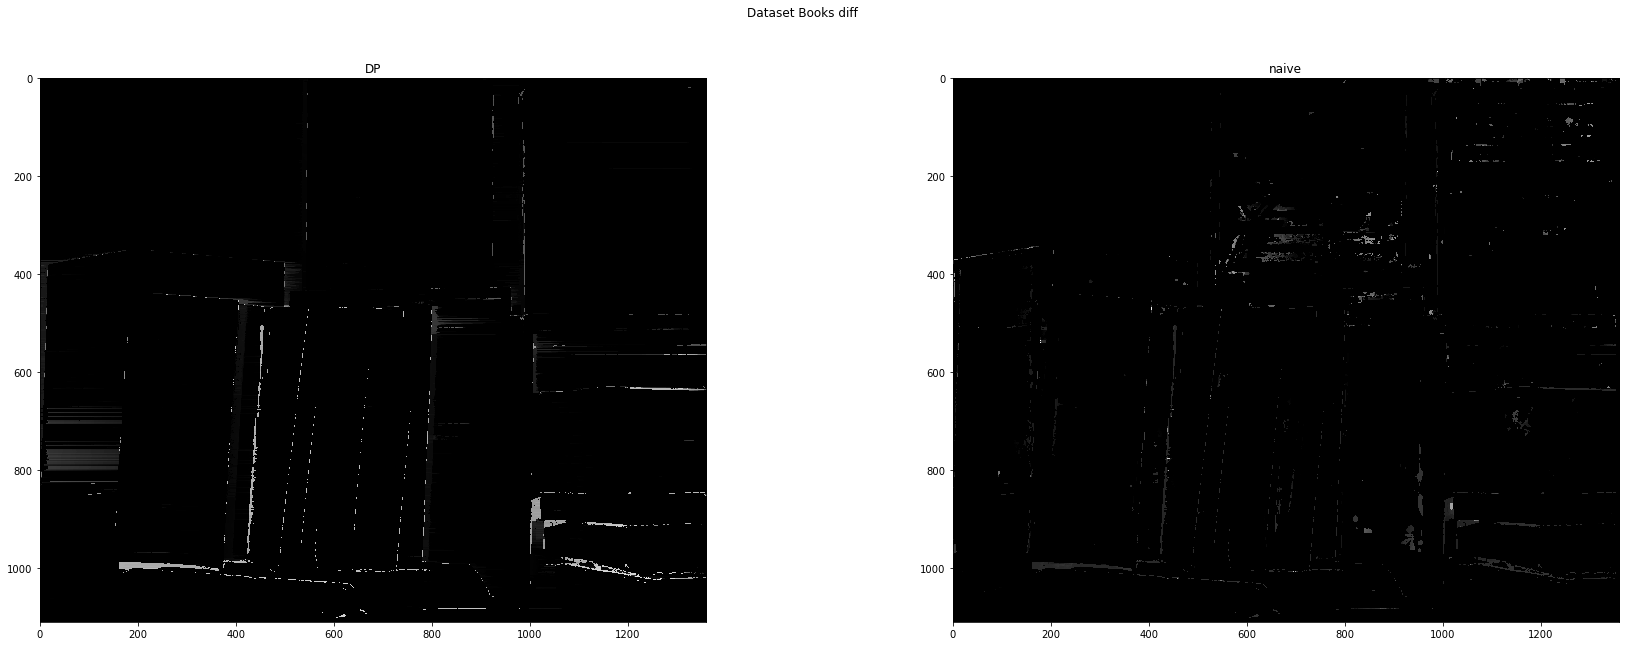

In [29]:
# diff images
for Dataset in datasets:
    display_image_diff(Dataset)

As a conclusion:
 - DP runs much faster and outputs much better results comparing to naive approach;
 - Picking up optimal lambda, we should remember that metrics do not account on a lost of small details;
 - For naive approach, ws is a crutial parameter, which improves the performance and increases the processing time dramatically;
 - DP approach almost does not depend on this value, but outputs better and faster result with ws=1
 - DP approach suffers from vanishing small details as they require adding lambda two times for a small disparity match, although improving the overall metric

Account that the results are averaged across Datasets, all the testing functions can be found in analysis/analysis.py <br/>
It could seem like there is not a lot of code in the report, but it uses crazy amount of additional custom functions, caching the results. <br/>
This allows produce the plots without rerunning all the output. <br/>
(I left it running for a night)

And some pointclouds, normals, mashes for optimal parameters for each method:

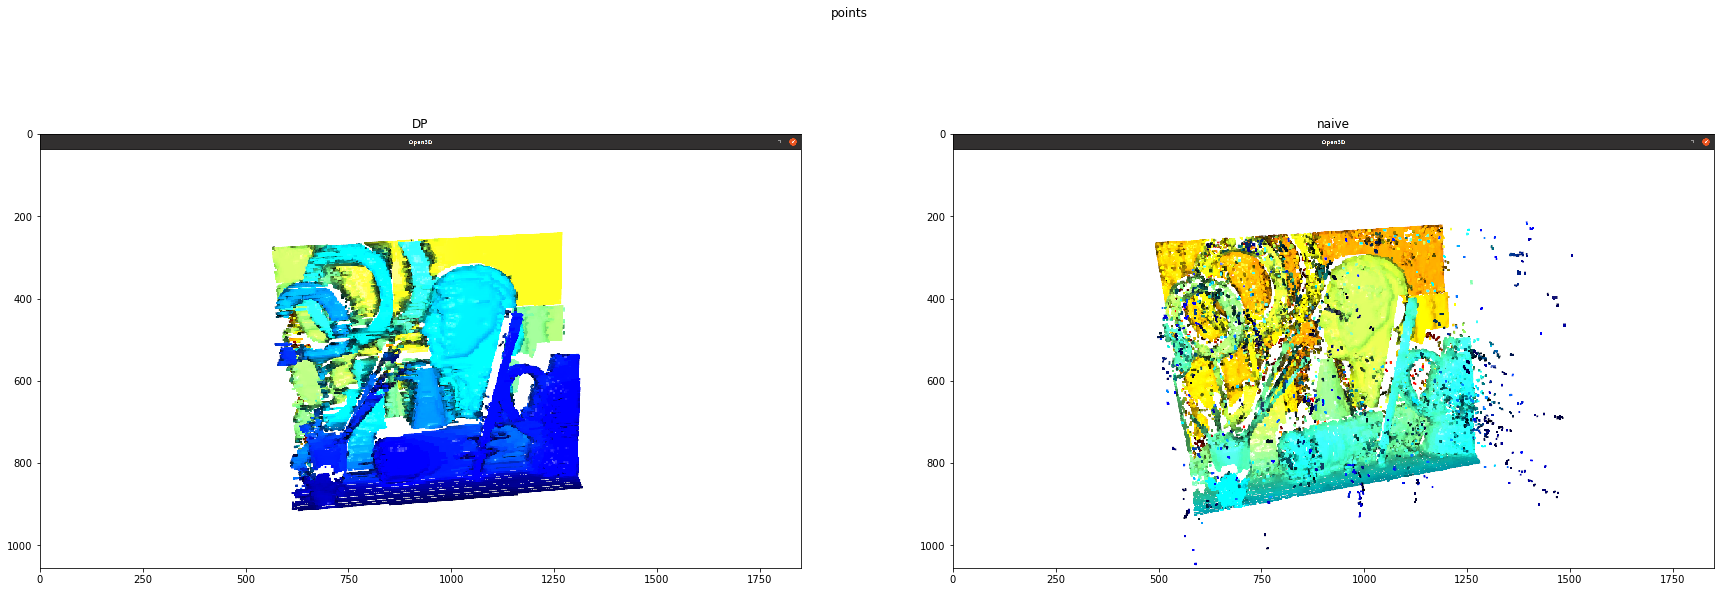

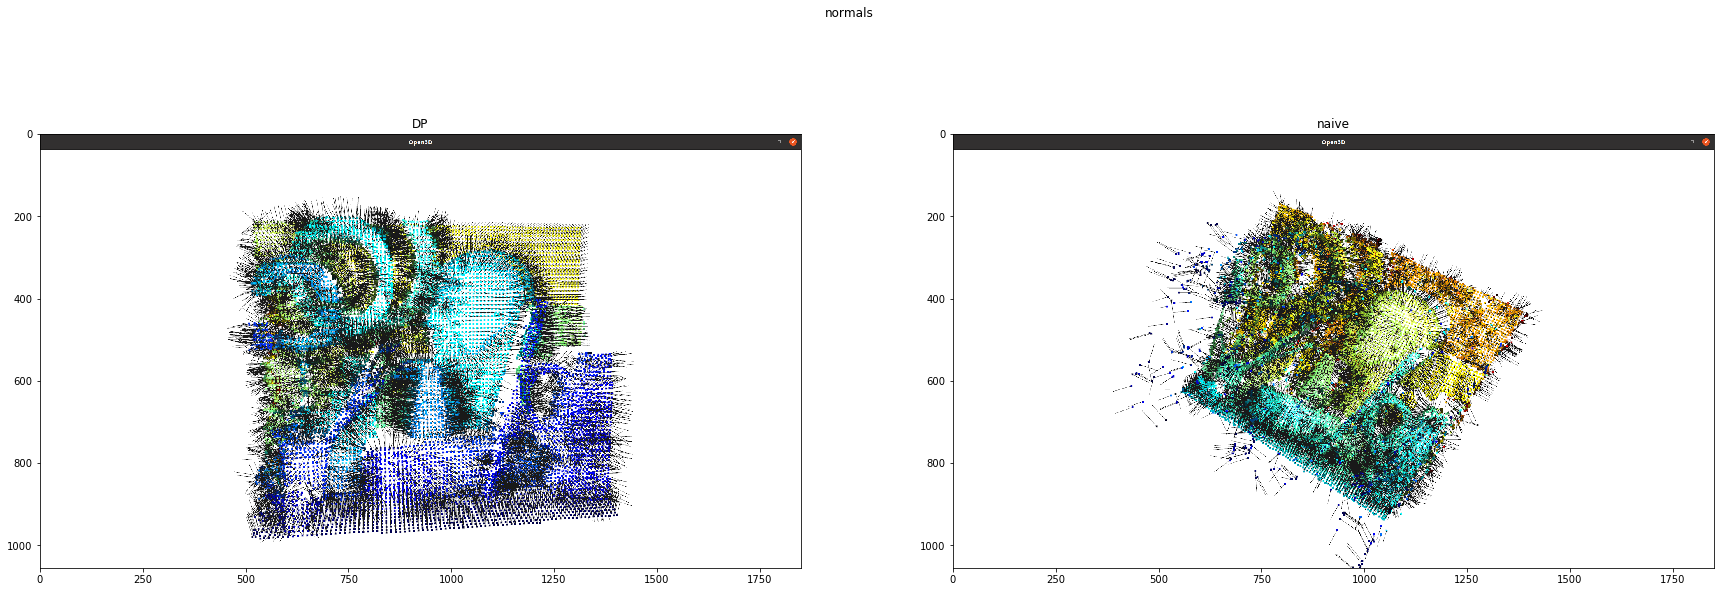

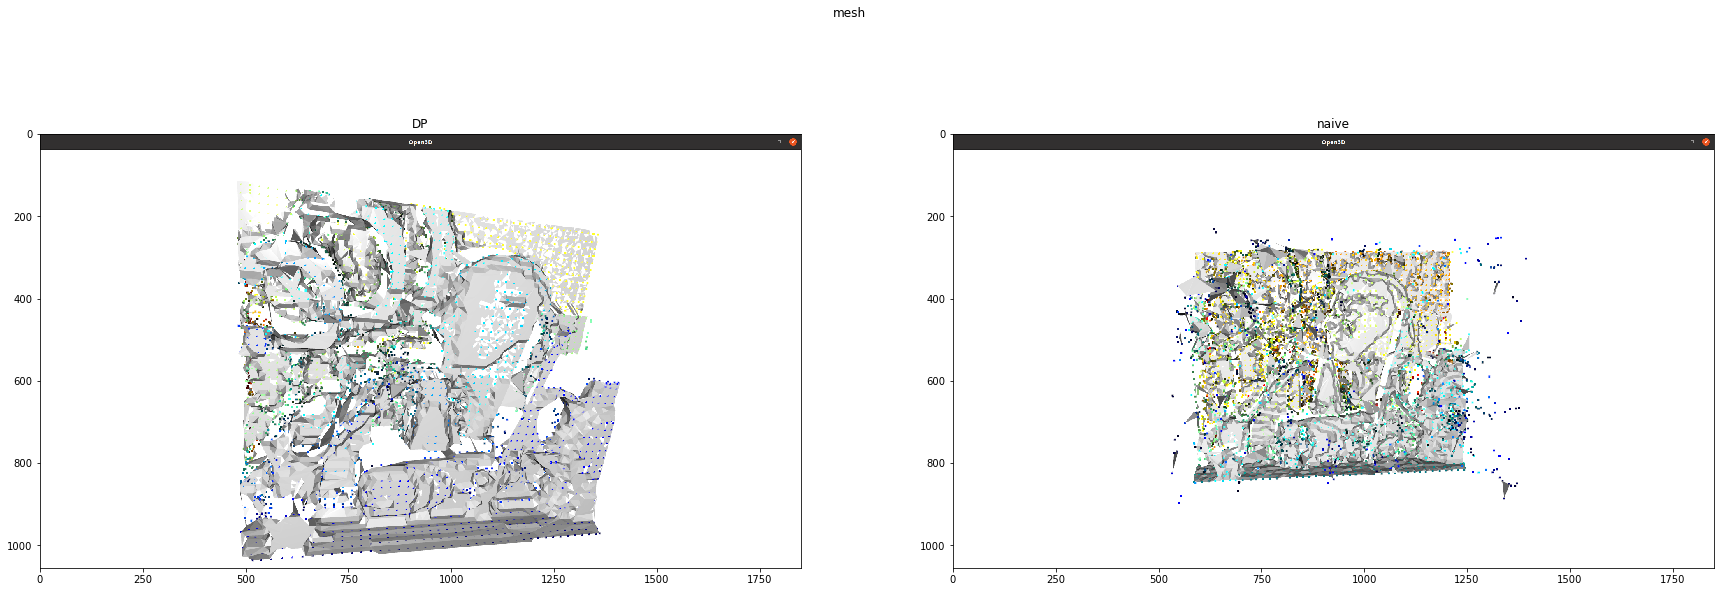

In [31]:
vis_types = ["points", "normals", "mesh"]
cmap_reversed = matplotlib.cm.get_cmap('autumn')
for vis_type in vis_types:
    f, ax = plt.subplots(1, len(methods))
    f.set_figheight(10)
    f.set_figwidth(30)
    for i, method in enumerate(methods):
        img_path = os.path.join("output", "3d", f"{vis_type}_{method}.png")
        img = cv2.imread(img_path, cv2.IMREAD_ANYCOLOR)
        img[:, :, :] = img[:, :, ::-1] # fixing a wierd bug
        ax[i].imshow(img)
        ax[i].set_title(method)
    plt.suptitle(f"{vis_type}")
    plt.show()

In [33]:
float("3.4")

3.4

Even though, naive approach is much more noisy, it seems that if we have enough computational resources, time and noise filtering, maybe sometimes it could be better to keep all the details of the picture, like small brush's hold. <br/>
But overall, dp is much cleaner "out of the box" without any additional filtering.